# Build models

### Import packages

In [384]:
import badlands_companion.toolGeo as simple
import badlands_companion.toolSea as tools
from badlands.model import Model as badlandsModel
import glob
import lavavu
from scripts import viewBadlands as visu
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import badlands_companion.toolTec as tec
import pandas as pd
from scripts import readInput as rInput
import cmocean as cmo
from matplotlib import cm

# display plots in SVG format
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

mpl.rcParams['font.family'] = 'Arial'


### Build topography

In [2]:
### Build topography

In [175]:
# def topography(shelf_length, shelf_angle, fname):
        
#         x = np.arange(0, 300000, 1000)
#         x = np.tile(x, 300)
#         x = np.vstack(x)

#         y = np.arange(0, 300000, 1000)
#         y = np.repeat(y, 300)
#         y = np.vstack(y)
                
#         shelf_depth = (shelf_length * np.tan(np.deg2rad(shelf_angle))) * -1
#         us_depth = (100000 * np.tan(np.deg2rad(2.0))) * -1
#         ls_depth = (50000 * np.tan(np.deg2rad(1.0))) * -1
                
#         hinter = np.linspace(87.27, 87.28, 50)
#         tr = np.linspace(0, 87.27, 51)
#         shelf = np.linspace(shelf_depth, 0, ((shelf_length//1000)+1))
#         print(shelf_depth)
#         slou = np.linspace(us_depth + shelf_depth, shelf_depth, 51)
#         slol = np.linspace((us_depth + ls_depth + shelf_depth), 
#                            us_depth + shelf_depth, (150 - (shelf_length//1000)))
        
#         topo = np.concatenate((slol, slou[1:], shelf[1:], tr[1:], hinter))

#         topo_r = topo[::-1]
#         topo_final = np.tile(topo_r, 300)
#         topo_final = np.vstack(topo_final)
        
#         gr = np.concatenate((x, y, topo_final), axis=1)
                
#         np.savetxt("data/{}.csv".format(fname), gr)
        
#         return topo_r


# shelf_ang_00 = topography(30000, 0.0, 'shelf_ang_00')
# shelf_ang_01 = topography(30000, 0.1, 'shelf_ang_01')
# shelf_ang_02 = topography(30000, 0.2, 'shelf_ang_02')
# shelf_ang_03 = topography(30000, 0.3, 'shelf_ang_03')
# shelf_ang_04 = topography(30000, 0.4, 'shelf_ang_04')
# shelf_ang_05 = topography(30000, 0.5, 'shelf_ang_05')

# shelf_0 = topography(0, 0.1, 'shelf_0')
# shelf_10 = topography(10000, 0.1, 'shelf_10')
# shelf_20 = topography(20000, 0.1, 'shelf_20')
# shelf_30 = topography(30000, 0.1, 'shelf_30')
# shelf_40 = topography(40000, 0.1, 'shelf_40')
# shelf_50 = topography(50000, 0.1, 'shelf_50')



-0.0
-52.359930725664015
-104.7201804478875
-157.0810681710038
-209.44291291489438
-261.8060337227637
-0.0
-17.453310241888005
-34.90662048377601
-52.359930725664015
-69.81324096755202
-87.26655120944002


In [452]:
def topography(shelf_length, shelf_angle, fname):
    
        x = np.arange(0, 300000, 1000)
        x = np.tile(x, 300)
        x = np.vstack(x)

        y = np.arange(0, 300000, 1000)
        y = np.repeat(y, 300)
        y = np.vstack(y)
        
        shelf_depth = (shelf_length * np.tan(np.deg2rad(shelf_angle))) * -1
        slope_depth = ((50000 - (shelf_length)) * np.tan(np.deg2rad(0.1))) * -1
                        
        hinter = np.linspace(43.6, 872.75, 50)
        tr = np.linspace(0, 43.6, 51)
        shelf = np.linspace(shelf_depth, 0, ((shelf_length//1000)+1))
        print(shelf_depth)
        
#         if 'ang' in fname: 
            
#             slope = np.geomspace(0.1, 1, 101 + shelf_length//1000) * (3000 + shelf_depth)
#             slope = (slope - 3000 - shelf_depth) + shelf_depth
            
#             basin = np.linspace(slope.min(), slope.min()+0.01, (100 - (shelf_length//1000)))
            
#         else:

        slope = np.geomspace(0.03, 1, 151) * 3000 + shelf_depth
        slope = (slope - 3000 - shelf_depth) + shelf_depth
        basin = np.linspace(slope_depth + slope.min(), slope.min(), (50 - (shelf_length//1000)))
                            
        topo = np.concatenate((basin, slope[1:], shelf[1:], tr[1:], hinter))
        
        noise = np.random.normal(0, 0.01, 300)
            
        topo_r = topo[::-1]
#         topo_r = topo_r[:300]
        topo_noise = topo_r + noise
        
        topo_final = np.tile(topo_noise, 300)
        topo_final = np.vstack(topo_final)
             
        gr = np.concatenate((x, y, topo_final), axis=1)
                
        np.savetxt("data/{}.csv".format(fname), gr)
              
        df = pd.read_csv("data/{}.csv".format(fname), sep=r'\s+', engine='c', header=None, na_filter=False, \
                                   dtype=np.float, low_memory=False)
        df.columns = ['x', 'y', 'z']
        df.loc[(df['y'] >= 150000) & (df['x'] < 100000) , 'z'] = df['z'] * 0.5
        
        np.savetxt("data/{}.csv".format(fname), df, header = '')
        
        return topo_r


shelf_ang_00 = topography(30000, 0.01, 'shelf_ang_00')
shelf_ang_01 = topography(30000, 0.1, 'shelf_ang_01')
shelf_ang_02 = topography(30000, 0.2, 'shelf_ang_02')
shelf_ang_03 = topography(30000, 0.3, 'shelf_ang_03')
shelf_ang_04 = topography(30000, 0.4, 'shelf_ang_04')
shelf_ang_05 = topography(30000, 0.5, 'shelf_ang_05')

shelf_0 = topography(0, 0.1, 'shelf_0')
shelf_10 = topography(10000, 0.1, 'shelf_10')
shelf_20 = topography(20000, 0.1, 'shelf_20')
shelf_30 = topography(30000, 0.1, 'shelf_30')
shelf_40 = topography(40000, 0.1, 'shelf_40')
shelf_50 = topography(50000, 0.1, 'shelf_50')

-5.235987809148758
-52.359930725664015
-104.7201804478875
-157.0810681710038
-209.44291291489438
-261.8060337227637
-0.0
-17.453310241888005
-34.90662048377601
-52.359930725664015
-69.81324096755202
-87.26655120944002


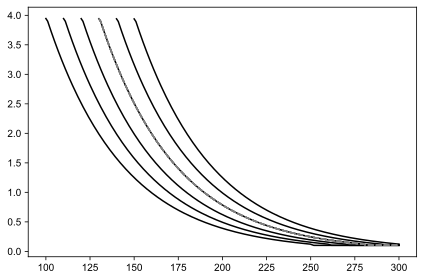

In [450]:
def slope(y, start, c, ls):

        y = y/1000
        x = np.linspace(start, 300, len(y))

        dy = np.gradient(y)
        dx = np.gradient(x)
        d = dy/dx

        slope = []

        for i in d:

            slope_angle = math.atan(i)
            slope_angle_degrees = math.degrees(slope_angle)
            slope.append(slope_angle_degrees * -1)
            
        plt.plot(x, slope, linestyle = ls, c = c)

slope(shelf_0[100:300], 100, 'k', '-')
slope(shelf_10[110:300], 110, 'k', '-')
slope(shelf_20[120:300], 120, 'k', '-')
slope(shelf_30[130:300], 130, 'k', '-')
slope(shelf_40[140:300], 140, 'k', '-')
slope(shelf_50[150:300], 150, 'k', '-')

slope(shelf_ang_00[130:300], 130, 'grey', '--')
slope(shelf_ang_01[130:300], 130, 'grey', '--')
slope(shelf_ang_02[130:300], 130, 'grey', '--')
slope(shelf_ang_03[130:300], 130, 'grey', '--')
slope(shelf_ang_04[130:300], 130, 'grey', '--')
slope(shelf_ang_05[130:300], 130, 'grey', '--')

# slope(shelf_30[0:300], 0, 'k', '-')






### Plot topography

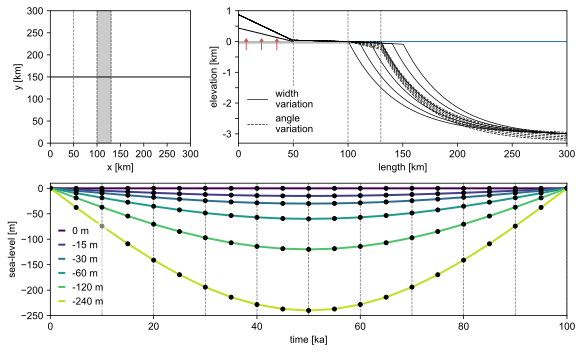

In [495]:
def shelf(data):
    x = np.linspace(0, len(data), len(data))
    return x

fig = plt.figure(figsize=(8.2, 5))
gs = fig.add_gridspec(nrows = 2, ncols = 3)
ax2 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1:])
ax3 = fig.add_subplot(gs[1, 0:])

lw = 0.7
ax1.plot(shelf(shelf_0), shelf_0, c='k', lw = lw, label = 'width\nvariation')
ax1.plot(shelf(shelf_10), shelf_10, c='k', lw = lw)
ax1.plot(shelf(shelf_20), shelf_20, c='k', lw = lw)
ax1.plot(shelf(shelf_30), shelf_30, c='k', lw = lw)
ax1.plot(shelf(shelf_40), shelf_40, c='k', lw = lw)
ax1.plot(shelf(shelf_50), shelf_50, c='k', lw = lw)

ax1.plot(shelf(shelf_ang_00), shelf_ang_00, c='k', linestyle='dashed', lw = lw,  label = 'angle\nvariation')
ax1.plot(shelf(shelf_ang_01), shelf_ang_01, c='k', linestyle='dashed', lw = lw)
ax1.plot(shelf(shelf_ang_02), shelf_ang_02, c='k', linestyle='dashed', lw = lw)
ax1.plot(shelf(shelf_ang_03), shelf_ang_03, c='k', linestyle='dashed', lw = lw)
ax1.plot(shelf(shelf_ang_04), shelf_ang_04, c='k', linestyle='dashed', lw = lw)
ax1.plot(shelf(shelf_ang_05), shelf_ang_05, c='k', linestyle='dashed', lw = lw)

ax1.plot([50, 50], [-3500, 1500], linestyle='dashed', c='dimgrey', lw = lw)
ax1.plot([100, 100], [-3500, 1500], linestyle='dashed', c='dimgrey', lw = lw)
ax1.plot([130, 130], [-3500, 1500], linestyle='dashed', c='dimgrey', lw = lw)
ax1.plot([100, 400], [0, 0],  c='tab:blue', lw=1., zorder=0)
# ax1.plot([145, 300], [-60, -60],  c='tab:blue', lw=1., zorder=0)

ax1.plot([0, 50], [shelf_30.max()*0.5, 0],  c='k', lw=1., zorder=0)

leg = ax1.legend(framealpha = 1, loc = 'lower left')
leg.get_frame().set_linewidth(0.0)

# ax1.annotate('Source', (0.40, 0.85), xycoords='figure fraction', fontsize=10)
# ax1.annotate('Transfer', (0.45, 0.85), xycoords='figure fraction', fontsize=10)
# ax1.annotate('Shelf', (0.50, 0.85), xycoords='figure fraction', fontsize=10)
# ax1.annotate('Upper slope', (0.55, 0.85), xycoords='figure fraction', fontsize=10)
# ax1.annotate('Lower slope', (0.65, 0.85), xycoords='figure fraction', fontsize=10)
# ax1.annotate('Basin floor', (0.7, 0.85), xycoords='figure fraction', fontsize=10)
# ax1.annotate('Sea level', (0.5, 0.85), xycoords='figure fraction', color='tab:blue',
#              fontsize=10, fontstyle='italic')

ax1.fill_between((0, 100), (-53), alpha=0.2, color='k')
ax1.fill_between(shelf(shelf_30), shelf_30, -53, 
                 where = (shelf(shelf_30) <= 130) & (shelf_30 <= 0), alpha=0.2, color='k')

ax1.arrow(7, -270, 0, 280, head_width=3, head_length=80, color='indianred')
ax1.arrow(21, -270, 0, 280, head_width=3, head_length=80, color='indianred')
ax1.arrow(35, -270, 0, 280, head_width=3, head_length=80, color='indianred')

ax1.set_ylabel('elevation [km]')
ax1.set_xlabel('length [km]')
ax1.set_xticks(np.linspace(0, 400, 9))
ax1.set_yticks([1500, 1000, 500, 0, -500, -1000, -1500, -2000, -2500, -3000])
ax1.set_yticklabels(['', 1, '', 0, '', -1, '', -2, '', -3])
ax1.set_ylim(-3300, 1000)
ax1.set_xlim(0, 300)

ax2.plot(np.arange(0, 300, 1), np.arange(0, 300, 1), lw = 0, c = 'w')
ax2.set_yticks(np.arange(0, 350, 50))
ax2.set_xticks(np.arange(0, 350, 50))
ax2.set_ylim(0, 300)
ax2.set_xlim(0, 300)
ax2.set_yticklabels(['0', '50', '100', '150', '200', '250', '300'])
ax2.set_xticklabels(['0', '50', '100', '150', '200', '250', '300'])
ax2.set_ylabel('y [km]')
ax2.set_xlabel('x [km]')

ax2.plot([50, 50], [0, 300], linestyle='dashed', c='dimgrey', lw = lw)
ax2.plot([100, 100], [-2500, 1000], linestyle='dashed', c='dimgrey', lw=lw)
ax2.plot([130, 130], [-2500, 1000], linestyle='dashed', c='dimgrey', lw=lw)
# ax2.plot([180, 180], [-2500, 1000], linestyle='dashed', c='dimgrey', lw=lw)
# ax2.plot([230, 230], [-2500, 1000], linestyle='dashed', c='dimgrey', lw=lw)
ax2.plot([0, 300], [150, 150],  c='k', lw=1., zorder=0)  

# ax1.annotate('', xy = (0.95, 0.83), xycoords='axes fraction', xytext = (0.1, 0.83), 
#             arrowprops=dict(color='k', arrowstyle =  '-|>'))
# ax2.annotate('', xy = (0.95, 0.96), xycoords='axes fraction', xytext = (0.05, 0.96), 
#             arrowprops=dict(color='k', arrowstyle =  '-|>'))

ax2.fill_between((100, 130), (300), alpha=0.2, color='k')

x = 0

color = iter(cm.viridis(np.linspace(0, 0.9, 6)))

labels = ['0 m', '-15 m', '-30 m', '-60 m', '-120 m', '-240 m']

for i in ['data/sea0.csv', 'data/sea15.csv', 'data/sea30.csv',
         'data/sea60.csv', 'data/sea120.csv', 'data/sea240.csv']:
    
    df = pd.read_csv(i, names = ['head'])
    df[['age', 'sea']] = df['head'].str.split(' ', 1, expand=True)
    df = df.drop(columns = 'head')
    df = df.astype('float64')
    
    ax3.plot(df.age[:-1]/1000, df.sea[:-1], c = next(color), lw = 2, label = labels[x])
    ax3.plot(df.age[:-1]/1000, df.sea[:-1], 'o', c = 'k', markersize = 4)
    
    x += 1
 
for i in np.arange(0, 110, 10):
    
    ax3.plot([i, i], [-300, 20], linestyle='dashed', c='dimgrey', lw=lw, zorder = 0)

ax3.set_ylim(-250, 10)
ax3.set_xlim(0, 100)
ax3.set_xlabel('time [ka]')
ax3.set_ylabel('sea-level [m]')   
leg = ax3.legend(framealpha = 0.5, loc = 'lower left', handlelength = 0.5, fontsize = 10)
leg.get_frame().set_linewidth(0.0) 

plt.savefig('figures/2_configuration.jpg', dpi = 300)

### Read grid & assign erodabilities

In [440]:
xyzfile = 'data/shelf_30.csv'
xyz = pd.read_csv(xyzfile, sep=r'\s+', engine='c', header=None, 
                  na_filter=False, dtype=np.float, low_memory=False)
xr = xyz.values[:,0]
yr = xyz.values[:,0]
dx = xr[1]-xr[0]

nx = int((xr[-1]-xr[0])/dx)+1
ny = int((yr[-1]-yr[0])/dx)+1

assert nx*ny==len(xr), 'Values not matching'

xm = xr.reshape((nx,ny),order='F')
ym = yr.reshape((nx,ny))

print('Regular grid resolution:',nx,ny)

xyz.columns = ['x', 'y', 'z']

Regular grid resolution: 300 300


In [441]:
## Shelf

# xyz.loc[xyz['x'] >= 0, 'k'] = 2e-6
# xyz.loc[((xyz['z'] <= 0) & (xyz['z'] >= -52.359930725664015)), 'k'] = 5e-6

## Marine

xyz.loc[xyz['z'] >= 0, 'k'] = 2e-6
# xyz.loc[(xyz['y'] >= 150000) & (xyz['x'] <= 100000), 'k'] = 1.5e-6
xyz.loc[xyz['z'] <= 0, 'k'] = 5e-6

ero = xyz.drop(columns=['x', 'y', 'z'])

# ero.to_csv('data/ero.csv', sep=' ', index=False , header=0)
ero.to_csv('data/ero.csv', sep=' ', index=False , header=0)

## Precip

In [ ]:
xyzfile = 'data/shelf_30.csv'
xyz = pd.read_csv(xyzfile, sep=r'\s+', engine='c', header=None, 
                  na_filter=False, dtype=np.float, low_memory=False)
xr = xyz.values[:,0]
yr = xyz.values[:,0]
dx = xr[1]-xr[0]

nx = int((xr[-1]-xr[0])/dx)+1
ny = int((yr[-1]-yr[0])/dx)+1

assert nx*ny==len(xr), 'Values not matching'

xm = xr.reshape((nx,ny),order='F')
ym = yr.reshape((nx,ny))

print('Regular grid resolution:',nx,ny)

xyz.columns = ['x', 'y', 'z']

xyz.loc[(xyz['z'] >= 87.28), 'p'] = 1
xyz.loc[(xyz['z'] < 87.28), 'p'] = 1
xyz.loc[(xyz['y'] >= 150000) & (xyz['x'] <= 100000), 'p'] = 0.1

precip = xyz.drop(columns=['x', 'y', 'z'])

# np.savetxt("data/precip.csv", precip)
        

### Uplift

In [482]:
## Set extent

# tecex = tec.toolTec(extentX=[0., 300000.], extentY=[0., 300000.], dx = 1000.)
tecex = tec.toolTec(extentX=[0., 300000.], extentY=[0., 300000.], dx = 1000.)

## Set uplift amplitude

tecex.disp1 = tecex.waveTec(A=105., P=100000., base=0., center = 0., axis='X')

## Display
tecex.dispView(width = 600, height = 600, dispmin = -1000, dispmax = 1000, dispData=tecex.disp1, title='Export Step Map')

In [483]:
## Save

tecex.dispGrid(disp = tecex.disp1, nameCSV = 'data/uplift')

In [484]:
uplift = pd.read_csv('data/uplift.csv', sep=r'\s+', engine='c', header=None, 
                  na_filter=False, dtype=np.float, low_memory=False)

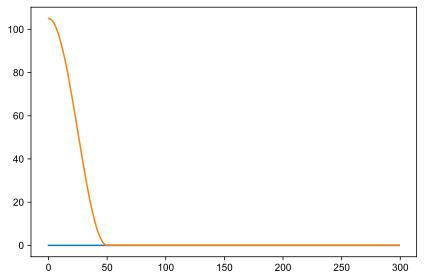

In [485]:
uplift = pd.read_csv('data/uplift.csv', sep=r'\s+', engine='c', header=None, 
                  na_filter=False, dtype=np.float, low_memory=False)

uplift = np.asarray(uplift)
uplift = uplift.reshape(300, 300)

for i in np.linspace(149, 299, 150, dtype=int):    
    
    uplift[i, :50] = uplift[i, :50] * 0
    
plt.plot(uplift[160, :])
plt.plot(uplift[130, :])

In [486]:
uplift = uplift.flatten()
uplift = pd.DataFrame(uplift)
uplift.to_csv('data/uplift.csv', sep=' ', index=False , header=0)



## Sea level

In [ ]:
# age = np.arange(0, 120000, 10000)
# sea = np.sin(np.linspace(0, 3.141592653589793, 11)) * -240
# sea = np.append(sea, 0)
# sea = np.round(sea, 2)

# sea_level = pd.DataFrame({"age" : age, "sea" : sea}, dtype = float)
# sea_level = sea_level["age"].astype(str).str.zfill(2) + ' ' + sea_level["sea"].astype(str).str.zfill(2)

# sea_level.to_csv("data/sea240.csv", index = False, header = False)

In [480]:
age = np.arange(0, 110000, 5000)
print(len(age))
sea = np.sin(np.linspace(0, 3.141592653589793, len(age)-1)) * -60
sea = np.append(sea, 0)
sea = np.round(sea, 2)

sea_level = pd.DataFrame({"age" : age, "sea" : sea}, dtype = float)
sea_level = sea_level["age"].astype(str).str.zfill(2) + ' ' + sea_level["sea"].astype(str).str.zfill(2)

sea_level.to_csv("miller/miller_120.csv", index = False, header = False)

22


(0.0, 20.0)

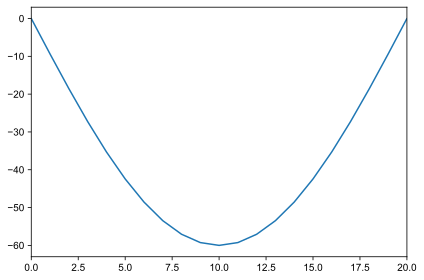

In [481]:
plt.plot(sea)
plt.xlim(0, 20)

In [ ]:
## Original models
sea = tools.toolSea()
sea.buildCurve(timeExt = [0., 120000.], timeStep = 10000., seaExt = [-60., -60.], 
                   ampExt = [60, 60.], periodExt = [120000., 120000.])

# sea.buildCurve(timeExt = [0., 120000.], timeStep = 10000., seaExt = [-60., -60.], 
#                    ampExt = [60, 60.], periodExt = [120000., 120000.])

# Sea-level varying models
# sea = tools.toolSea()
# sea.buildCurve(timeExt = [0., 1000000.], timeStep = 10000., seaExt = [0.,0.], 
#                    ampExt = [50., 50.], periodExt = [1000000., 1000000.])

## Visualize
sea.plotCurves(fsize = (4,5), figName = 'Sea level')

In [ ]:
# Export the sea-level file  to the data folder
sea.exportCurve(nameCSV = 'data/sea')

MISC

In [ ]:
# x = np.linspace(0, 300000, 300)
# fig = plt.figure(figsize=(8, 8))
# gs = fig.add_gridspec(nrows = 3, ncols = 3)
# ax2 = fig.add_subplot(gs[0, 0])
# ax1 = fig.add_subplot(gs[0, 1:])
# ax3 = fig.add_subplot(gs[1, 0:])
# ax4 = fig.add_subplot(gs[2, 0:])

# lw = 0.7
# ax1.plot(x/1000, shelf_0, c='k', lw = lw, label = 'width\nvariation')
# ax1.plot(x/1000, shelf_10, c='k', lw = lw)
# ax1.plot(x/1000, shelf_20, c='k', lw = lw)
# ax1.plot(x/1000, shelf_30, c='k', lw = lw)
# ax1.plot(x/1000, shelf_40, c='k', lw = lw)
# ax1.plot(x/1000, shelf_50, c='k', lw = lw)

# ax1.plot(x/1000, shelf_ang_00, c='k', linestyle='dashed', lw = lw,  label = 'angle\nvariation')
# ax1.plot(x/1000, shelf_ang_01, c='k', linestyle='dashed', lw = lw)
# ax1.plot(x/1000, shelf_ang_02, c='k', linestyle='dashed', lw = lw)
# ax1.plot(x/1000, shelf_ang_03, c='k', linestyle='dashed', lw = lw)
# ax1.plot(x/1000, shelf_ang_04, c='k', linestyle='dashed', lw = lw)
# ax1.plot(x/1000, shelf_ang_05, c='k', linestyle='dashed', lw = lw)

# ax1.plot([50, 50], [-2500, 1500], linestyle='dashed', c='dimgrey', lw = lw)
# ax1.plot([100, 100], [-2500, 1500], linestyle='dashed', c='dimgrey', lw = lw)
# ax1.plot([130, 130], [-2500, 1500], linestyle='dashed', c='dimgrey', lw = lw)
# ax1.plot([180, 180], [-2500, 1500], linestyle='dashed', c='dimgrey', lw = lw)
# ax1.plot([230, 230], [-2500, 1500], linestyle='dashed', c='dimgrey', lw = lw)
# ax1.plot([100, 300], [0, 0],  c='tab:blue', lw=1., zorder=0)
# ax1.plot([152, 300], [-120, -120],  c='tab:blue', lw=1., zorder=0)

# leg = ax1.legend(framealpha = 1)
# leg.get_frame().set_linewidth(0.0)

# # ax1.annotate('Source', (0.40, 0.85), xycoords='figure fraction', fontsize=10)
# # ax1.annotate('Transfer', (0.45, 0.85), xycoords='figure fraction', fontsize=10)
# # ax1.annotate('Shelf', (0.50, 0.85), xycoords='figure fraction', fontsize=10)
# # ax1.annotate('Upper slope', (0.55, 0.85), xycoords='figure fraction', fontsize=10)
# # ax1.annotate('Lower slope', (0.65, 0.85), xycoords='figure fraction', fontsize=10)
# # ax1.annotate('Basin floor', (0.7, 0.85), xycoords='figure fraction', fontsize=10)
# # ax1.annotate('Sea level', (0.5, 0.85), xycoords='figure fraction', color='tab:blue',
# #              fontsize=10, fontstyle='italic')

# ax1.fill_between((0, 100), (-53), alpha=0.2, color='k')
# ax1.fill_between(x/1000, shelf_30, -53, where = (x/1000 <= 130) & (shelf_30 <= 0), alpha=0.2, color='k')

# ax1.arrow(7, -0, 0, 610, head_width=3, head_length=80, color='indianred')
# ax1.arrow(21, -0, 0, 320, head_width=3, head_length=80, color='indianred')
# ax1.arrow(35, -0, 0, 120, head_width=3, head_length=80, color='indianred')

# ax1.set_ylabel('elevation [km]')
# ax1.set_xlabel('length [km]')
# ax1.set_xticks(np.linspace(0, 300, 7))
# ax1.set_yticks([1500, 1000, 500, 0, -500, -1000, -1500, -2000, -2500])
# ax1.set_yticklabels(['', 1, '', 0, '', -1, '', -2, ''])
# ax1.set_ylim(-3000, 1500)
# ax1.set_xlim(0, 300)

# ax2.plot(np.arange(0, 300, 1), np.arange(0, 300, 1), lw = 0, c = 'w')
# ax2.set_yticks(np.arange(0, 350, 50))
# ax2.set_xticks(np.arange(0, 350, 50))
# ax2.set_ylim(0, 300)
# ax2.set_xlim(0, 300)
# ax2.set_yticklabels(['0', '50', '100', '150', '200', '250', '300'])
# ax2.set_xticklabels(['0', '50', '100', '150', '200', '250', '300'])
# ax2.set_ylabel('y [km]')
# ax2.set_xlabel('x [km]')

# ax2.plot([50, 50], [0, 300], linestyle='dashed', c='dimgrey', lw = lw)
# ax2.plot([100, 100], [-2500, 1000], linestyle='dashed', c='dimgrey', lw=lw)
# ax2.plot([130, 130], [-2500, 1000], linestyle='dashed', c='dimgrey', lw=lw)
# ax2.plot([180, 180], [-2500, 1000], linestyle='dashed', c='dimgrey', lw=lw)
# ax2.plot([230, 230], [-2500, 1000], linestyle='dashed', c='dimgrey', lw=lw)
# ax2.plot([0, 300], [150, 150],  c='k', lw=1., zorder=0)  

# ax1.annotate('', xy = (0.95, 0.83), xycoords='axes fraction', xytext = (0.1, 0.83), 
#             arrowprops=dict(color='k', arrowstyle =  '-|>'))
# ax2.annotate('', xy = (0.95, 0.96), xycoords='axes fraction', xytext = (0.05, 0.96), 
#             arrowprops=dict(color='k', arrowstyle =  '-|>'))

# ax2.fill_between((100, 130), (300), alpha=0.2, color='k')


# miller = pd.read_excel(io = 'miller/miller_120_curve.xls')
# miller_og = pd.read_excel(io = 'miller/miller_2020_tableS1.xlsx')
# ax3.plot(miller.age, miller.sea, lw = 2, c = 'tab:blue', label = 'modelled sea-level', zorder = 3)
# # ax3.plot(miller.age, miller.sea, 'o', c = 'tab:blue', markersize = 4, zorder = 3)
# ax3.plot(miller_og['Age (ka)'], miller_og['Sea Level (m)'], lw = 1, c = 'grey', label = 'eustatic sea-level (Miller et al. 2020)')
# ax3.set_xlim(0, 120)
# ax3.set_ylim(-130, 10)
# ax3.set_xticks(np.arange(0, 140, 20))
# ax3.set_ylabel('sea-level [m]')
# ax3.set_xlabel('time [kyr]')
# ax3.legend(loc = 'lower right')
# leg = ax3.legend(framealpha = 1)
# leg.get_frame().set_linewidth(0.0)

# for i in np.arange(0, 130, 10):
    
#     ax3.plot([i, i], [-300, 20], linestyle='dashed', c='dimgrey', lw=lw, zorder = 0)
#     ax4.plot([i, i], [-300, 20], linestyle='dashed', c='dimgrey', lw=lw, zorder = 0)

# x = 0

# color = iter(cm.viridis(np.linspace(0, 0.9, 6)))

# labels = ['0 m', '-15 m', '-30 m', '-60 m', '-120 m', '-240 m']

# for i in ['data/sea0.csv', 'data/sea15.csv', 'data/sea30.csv',
#          'data/sea60.csv', 'data/sea120.csv', 'data/sea240.csv']:
    
#     df = pd.read_csv(i, names = ['head'])
#     df[['age', 'sea']] = df['head'].str.split(' ', 1, expand=True)
#     df = df.drop(columns = 'head')
#     df = df.astype('float64')
    
#     ax4.plot(df.age[:-1]/1000, df.sea[:-1], c = next(color), lw = 2, label = labels[x])
#     ax4.plot(df.age[:-1]/1000, df.sea[:-1], 'o', c = 'k', markersize = 4)
#     x += 1

# ax4.set_ylim(-250, 10)
# ax4.set_xlim(0, 120)
# ax4.set_xlabel('time [ka]')
# ax4.set_ylabel('sea-level [m]')   
# leg = ax4.legend(framealpha = 1, loc = 'lower left', handlelength = 0.5, fontsize = 10)
# leg.get_frame().set_linewidth(0.0) 


# plt.savefig('figures/2_configuration.pdf')